<h2>Analyse en composantes principales</h2>

<h3>Importation des bibliothèques</h3>

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


<h3>Importation des données</h3>

In [2]:
#chargement de la première feuille de données
data = pd.read_csv("villes.csv", delimiter=";", encoding='latin-1', header=0, index_col=0)

<h3>Nettoyage des données</h3>

In [3]:
#taille de la matrice
data.shape
#suppression des quatre dernières lignes
data=data.dropna()
data.drop(columns=["Latitude", "Longitude", "Géographie"],inplace=True)
#Nombre d'observations
n = data.shape[0]
#Nombre de variables
p = data.shape[1]
data.head(5)

,JANVIERp,FEVRIERp,MARSp,AVRILp,MAIp,JUINp,JUILLETp,AOUTp,SEPTEMBREp,OCTOBREp,...,SEPTEMBREnb.j.pl,OCTOBREnb.j.pl,NOVEMBREnb.j.pl,DECEMBREnb.j.pl,Nombre annuel de jours de pluie,Température moyenne annuelle,Amplitude annuelle des températures,Insolation annuelle,Précipitations de mai à aout,Précipitations sept-oct
Ajaccio,78.0,69.0,51.0,39.0,43.0,23.0,10.0,15.0,43.0,81.0,...,6.0,10.0,11.0,13.0,95.0,14.71,14.5,2811.0,13.9,25.8
Angers,65.0,50.0,60.0,45.0,50.0,55.0,35.0,60.0,55.0,65.0,...,12.0,13.0,15.0,16.0,154.0,11.28,14.5,1899.0,29.0,30.8
Angoulème,79.0,68.0,64.0,62.0,70.0,58.0,53.0,66.0,69.0,70.0,...,12.0,13.0,15.0,16.0,160.0,12.02,14.9,1989.0,29.9,31.0
Besançon,94.0,87.0,75.0,74.0,86.0,107.0,80.0,116.0,106.0,78.0,...,13.0,14.0,15.0,15.0,169.0,10.04,17.6,1897.0,35.8,35.5
Biarritz,128.0,105.0,98.0,102.0,100.0,91.0,69.0,123.0,155.0,152.0,...,14.0,15.0,16.0,17.0,177.0,13.58,12.3,1921.0,26.0,36.8


<h3>Préparation des données</h3>

<h4>Centrage et réduction</h4>

In [4]:
#instanciation 
sc = StandardScaler() 
#transformation – centrage-réduction
m = sc.fit_transform(data) 
print(m)

[[ 0.54719493  0.49892739 -0.35160018 ...  1.88031208 -2.08607274
  -1.87189519]
 [-0.0218878  -0.60486403  0.25283608 ... -0.42367579 -0.17700011
  -0.91627302]
 [ 0.59097052  0.44083311  0.52147442 ... -0.19630856 -0.06321433
  -0.87804813]
 ...
 [-0.54719493 -0.60486403 -0.28444059 ...  0.03611126  0.34135736
  -0.61047393]
 [-0.10943899 -0.3143926  -0.28444059 ... -0.52472789  0.16435725
  -0.66781126]
 [-0.67852171 -0.89533546 -0.35160018 ... -0.48935965  1.42864376
   1.22432064]]


<h4>Calcul de la moyenne et l'écart-type</h4>

In [5]:
#moyenne
print(np.mean(m, axis=0))
#écart-type
print(np.std(m, axis=0, ddof=0))

[-2.61228947e-17 -1.46941283e-16  3.42862993e-17 -1.16328515e-16
  2.41636776e-16 -9.79608551e-17 -4.57150657e-17 -1.27349112e-16
  1.42043240e-16 -1.17553026e-16 -1.79594901e-16  1.89390987e-16
 -1.70411071e-16  8.48994078e-17 -3.91843420e-17  3.98374144e-16
 -2.93882565e-17  3.06944013e-16 -9.46954933e-17  1.86125625e-16
 -2.93882565e-17  9.46954933e-17 -1.99187072e-16  6.85725986e-17
  2.74290394e-16 -4.24497039e-16 -6.92256709e-16  9.24097400e-16
  4.76742828e-16 -7.77156117e-16  1.47594355e-15]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1.]


<h3>La matrice de corrélation</h3>

In [6]:
# Calcul de la matrice de corrélation
correlation_matrix = np.corrcoef(m, rowvar=False)

# Affichage de la matrice de corrélation
print("Matrice de corrélation :\n", correlation_matrix)


Matrice de corrélation :
 [[ 1.          0.89951363  0.78730152  0.7777605   0.47825977  0.28183684
   0.26622935  0.43026853  0.69193426  0.56482268  0.76092012  0.91622464
   0.88053244  0.41962129  0.35456465  0.48175921  0.43846046  0.43263871
   0.24548614  0.2820581   0.27239537  0.40049331  0.5624017   0.4771902
   0.5086087   0.41666802  0.0398699  -0.54637621 -0.11967832 -0.32344207
  -0.55925704]
 [ 0.89951363  1.          0.89446269  0.81503525  0.34354235  0.11328689
   0.07480963  0.2466846   0.74630035  0.75198793  0.88006224  0.94085319
   0.87286266  0.09943236  0.02268592  0.18445221  0.15128198  0.14575074
  -0.04406463 -0.01710263 -0.02238194  0.09265246  0.27096266  0.14226402
   0.19558725  0.09534636  0.32822256 -0.46755929  0.19029264 -0.5540342
  -0.46611314]
 [ 0.78730152  0.89446269  1.          0.84918175  0.40571361  0.15131238
   0.03082993  0.29756273  0.79525144  0.8306968   0.83396292  0.8763193
   0.87001298 -0.03295183 -0.10505872  0.07160876  0.045811

<h3>Analyse des données en utilisant l'ACP</h3>

<h4>Instanciation et lancement des calculs</h4>

In [7]:
#instanciation 
acp = PCA(svd_solver='full')
#calculs 
coord = acp.fit_transform(m)
print(coord)
#nombre de composantes calculées
print(acp.n_components_)


[[ 6.59216533e+00  1.79473469e+00  3.46830472e+00 ...  4.58635388e-03
   1.95557919e-15 -6.26572488e-17]
 [-6.02930818e-01 -7.96007865e-01  1.82603251e+00 ... -3.02724878e-03
   2.00665432e-15  2.71217709e-16]
 [-1.94239703e+00  8.57997282e-01  6.50448817e-01 ... -1.45700690e-02
  -5.28518561e-16  4.00464048e-16]
 ...
 [ 8.72545870e-01 -1.31765682e+00 -4.93713837e-02 ... -1.24438264e-02
  -1.42149316e-15  7.19742478e-16]
 [-1.14094211e+00 -1.30360766e+00  1.07218640e+00 ... -1.20950187e-02
   3.13342804e-15 -7.06839044e-16]
 [-2.51567565e+00 -1.96111520e+00 -2.13871661e+00 ... -1.90423950e-02
   1.26300922e-15 -1.33132747e-16]]
31


<h4>Valeurs propres</h4>

In [8]:
#les valeurs propres associées aux composantes principales
val_p=acp.explained_variance_ 
#les vecteurs propres
vec_p = acp.components_


<h3>Inerties et inertie cumulée</h3>

In [9]:
inertie_totale = np.sum(val_p)
inertie_expliquée = val_p / inertie_totale
inertie_cumulée = np.cumsum(inertie_expliquée)
print(inertie_cumulée)

[0.52614274 0.79929241 0.91492593 0.9437236  0.95579113 0.96404249
 0.97141165 0.97656758 0.9811111  0.98485875 0.9881448  0.990175
 0.99178445 0.99322026 0.9945414  0.99551441 0.99636503 0.99712829
 0.99781598 0.99842834 0.99883649 0.99917154 0.99944859 0.9996544
 0.99981189 0.99990588 0.99996842 0.99999013 1.         1.
 1.        ]


<h3>Détermination des axes factoriels</h3>

In [10]:
#la proportion de la variance totale expliquée par chaque composante principale.
acp.explained_variance_ratio_

array([5.26142742e-01, 2.73149665e-01, 1.15633525e-01, 2.87976698e-02,
       1.20675262e-02, 8.25136202e-03, 7.36916110e-03, 5.15592803e-03,
       4.54352445e-03, 3.74764920e-03, 3.28604527e-03, 2.03020452e-03,
       1.60944932e-03, 1.43580837e-03, 1.32113877e-03, 9.73008398e-04,
       8.50620156e-04, 7.63262054e-04, 6.87687998e-04, 6.12362511e-04,
       4.08153063e-04, 3.35045058e-04, 2.77048578e-04, 2.05812185e-04,
       1.57490502e-04, 9.39902465e-05, 6.25412323e-05, 2.17090305e-05,
       9.87006752e-06, 8.31036844e-32, 2.76509309e-33])

In [11]:
# Liste des composantes principales
list_acp = ["CP1","CP2","CP3","CP4","CP5","CP6","CP7","CP8","CP9","CP10","CP11","CP12","CP13","CP14","CP15","CP16", "CP17","CP18","CP19","CP20","CP21","CP22","CP23","CP24", "CP25","CP26","CP27","CP28","CP29","CP30","CP31"]
df_acp = pd.DataFrame(list_acp, columns = ["ACP"])
df_acp['explained_variance'] = val_p
explained_variance_ratio = acp.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
# Déterminer le nombre optimal de composantes 
n_components = np.argmax(cumulative_variance_ratio >= 0.9) + 1
n_components

3

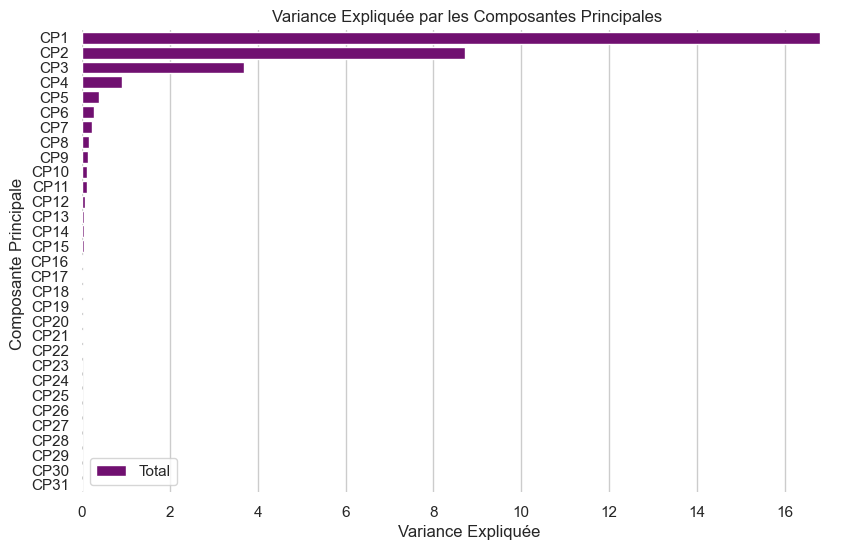

In [12]:
#Définir le style du fond
sns.set(style="whitegrid")

# Initialiser le graphique matplotlib
plt.figure(figsize=(10, 6))

# Utiliser un barplot horizontal
bar_plot = sns.barplot(x='explained_variance', y="ACP", data=df_acp,
                       label="Total", color="purple")

# Ajouter une touche esthétique
sns.despine(left=True, bottom=True)

# Ajouter des titres et des étiquettes
plt.title('Variance Expliquée par les Composantes Principales ')
plt.xlabel('Variance Expliquée')
plt.ylabel('Composante Principale ')

# Afficher le graphique
plt.show()

<h3>Cercle de corrélation pour le premier plan</h3>

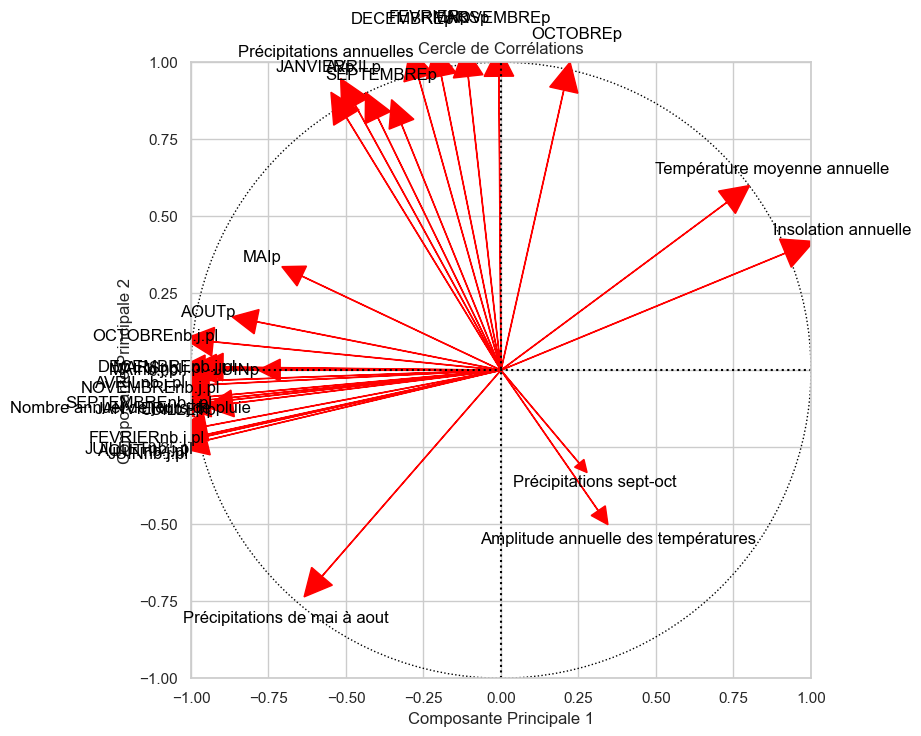

In [13]:
# on a déjà ajusté l'ACP sur données avec 3 composantes principales
acp = PCA(n_components=3)
principal_components = acp.fit_transform(m)

# r(Cj,Xi)
loadings = acp.components_.T * np.sqrt(acp.explained_variance_)

# Création d'un DataFrame pour les charges factorielles
loadings_df = pd.DataFrame(data=loadings, columns=[f'CP{i+1}' for i in range(acp.n_components_)], index=data.columns)

# Sélection des deux premières composantes principales
loadings_2d = loadings_df[['CP1', 'CP2']]

# Visualisation du cercle de corrélations
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

# Dessiner le cercle unitaire
circle = plt.Circle((0, 0), 1, fill=False, color='black', linestyle='dotted')
ax.add_artist(circle)

# Ajouter les flèches pour chaque variable sur les deux premières composantes

for i, variable in enumerate(loadings_2d.index):
    arrow_length = np.sqrt(loadings_2d['CP1'].iloc[i]**2 + loadings_2d['CP2'].iloc[i]**2)
    ax.arrow(0, 0, loadings_2d['CP1'].iloc[i], loadings_2d['CP2'].iloc[i], head_width=arrow_length*0.1, head_length=arrow_length*0.1, fc='red', ec='red')
    ax.text(loadings_2d['CP1'].iloc[i]*1.2, loadings_2d['CP2'].iloc[i]*1.2, variable, color='black', ha='center', va='center')

# Ajouter des labels pour les composantes principales
ax.annotate('CP1', (1.1, 0))
ax.annotate('CP2', (0, 1.1))

# Ajouter des axes
ax.axhline(0, color='black', linestyle='dotted')
ax.axvline(0, color='black', linestyle='dotted')

# Afficher le graphique
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Cercle de Corrélations')
plt.grid(True)
plt.show()

<h3>Cercle de corrélation pour le deuxième plan</h3>

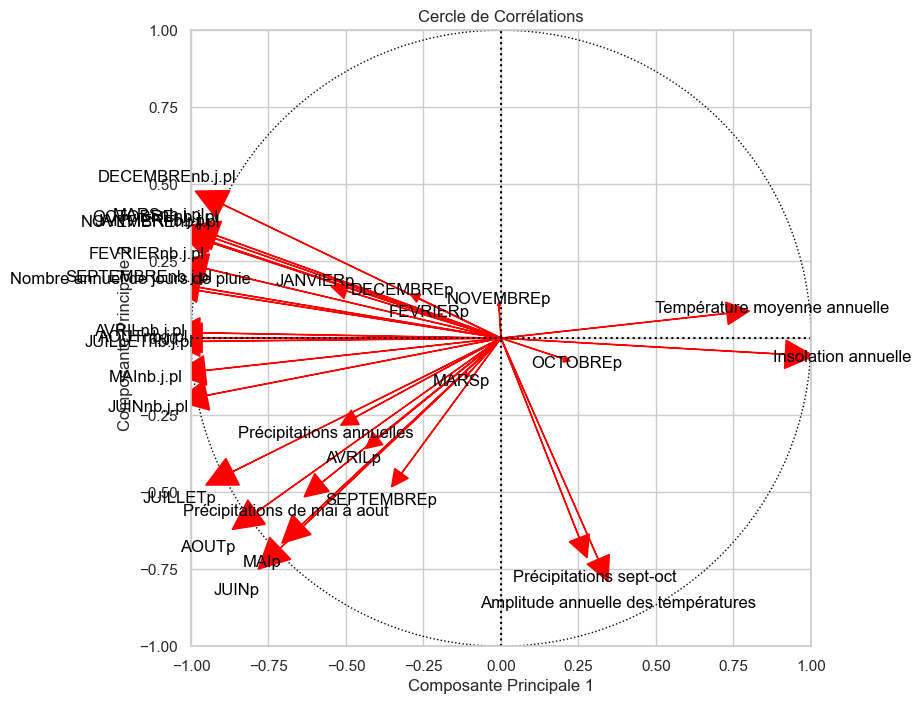

In [14]:
# on a déjà ajusté l'ACP sur données avec 3 composantes principales
acp = PCA(n_components=3)
principal_components = acp.fit_transform(m)

# r(Cj,Xi)
loadings = acp.components_.T * np.sqrt(acp.explained_variance_)

# Création d'un DataFrame pour les charges factorielles
loadings_df = pd.DataFrame(data=loadings, columns=[f'CP{i+1}' for i in range(acp.n_components_)], index=data.columns)

# Sélection des deux premières composantes principales
loadings_2d = loadings_df[['CP1', 'CP3']]

# Visualisation du cercle de corrélations
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

# Dessiner le cercle unitaire
circle = plt.Circle((0, 0), 1, fill=False, color='black', linestyle='dotted')
ax.add_artist(circle)

# Ajouter les flèches pour chaque variable sur les deux composantes

for i, variable in enumerate(loadings_2d.index):
    arrow_length = np.sqrt(loadings_2d['CP1'].iloc[i]**2 + loadings_2d['CP3'].iloc[i]**2)
    ax.arrow(0, 0, loadings_2d['CP1'].iloc[i], loadings_2d['CP3'].iloc[i], head_width=arrow_length*0.1, head_length=arrow_length*0.1, fc='red', ec='red')
    ax.text(loadings_2d['CP1'].iloc[i]*1.2, loadings_2d['CP3'].iloc[i]*1.2, variable, color='black', ha='center', va='center')

# Ajouter des labels pour les composantes principales
ax.annotate('CP1', (1.1, 0))
ax.annotate('CP3', (0, 1.1))

# Ajouter des axes
ax.axhline(0, color='black', linestyle='dotted')
ax.axvline(0, color='black', linestyle='dotted')

# Afficher le graphique
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Cercle de Corrélations')
plt.grid(True)
plt.show()

<h3>Cercle de corrélation pour le troisième plan</h3>

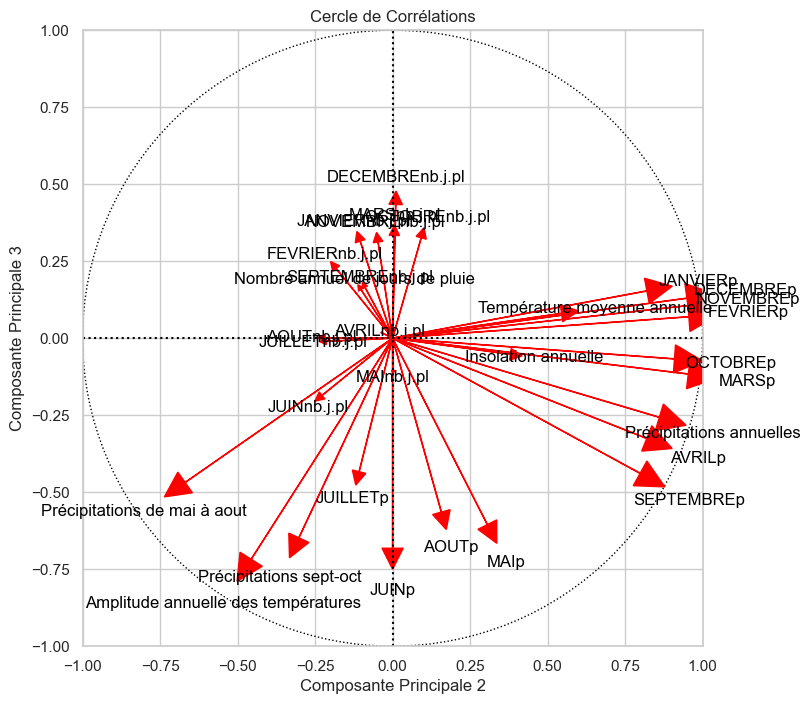

In [15]:
# on a déjà ajusté l'ACP sur données avec 3 composantes principales
acp = PCA(n_components=3)
principal_components = acp.fit_transform(m)

# r(Cj,Xi)
loadings = acp.components_.T * np.sqrt(acp.explained_variance_)

# Création d'un DataFrame pour les charges factorielles
loadings_df = pd.DataFrame(data=loadings, columns=[f'CP{i+1}' for i in range(acp.n_components_)], index=data.columns)

# Sélection des deux premières composantes principales
loadings_2d = loadings_df[['CP2', 'CP3']]

# Visualisation du cercle de corrélations
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

# Dessiner le cercle unitaire
circle = plt.Circle((0, 0), 1, fill=False, color='black', linestyle='dotted')
ax.add_artist(circle)

# Ajouter les flèches pour chaque variable sur les deux composantes

for i, variable in enumerate(loadings_2d.index):
    arrow_length = np.sqrt(loadings_2d['CP2'].iloc[i]**2 + loadings_2d['CP3'].iloc[i]**2)
    ax.arrow(0, 0, loadings_2d['CP2'].iloc[i], loadings_2d['CP3'].iloc[i], head_width=arrow_length*0.1, head_length=arrow_length*0.1, fc='red', ec='red')
    ax.text(loadings_2d['CP2'].iloc[i]*1.2, loadings_2d['CP3'].iloc[i]*1.2, variable, color='black', ha='center', va='center')

# Ajouter des labels pour les composantes principales
ax.annotate('CP2', (1.1, 0))
ax.annotate('CP3', (0, 1.1))

# Ajouter des axes
ax.axhline(0, color='black', linestyle='dotted')
ax.axvline(0, color='black', linestyle='dotted')

# Afficher le graphique
plt.xlabel('Composante Principale 2')
plt.ylabel('Composante Principale 3')
plt.title('Cercle de Corrélations')
plt.grid(True)
plt.show()

<h3>Interprétation</h3>

<h4>Contribution des individus aux axes du premier plan</h4>

In [16]:
#Contributions des individus aux axes du premier plan
ctr = coord**2
for j in range(31):
    ctr[:,j] = ctr[:,j]/(31*val_p[j])

df_ctr_cp1cp2 = pd.DataFrame({'id':data.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})
#Garder les individus interprétables du premier axe du premier plan
print(df_ctr_cp1cp2[df_ctr_cp1cp2['CTR_1'] > df_ctr_cp1cp2.CTR_1.mean()])
#Garder les individus interprétables du deuxième axe du premier plan
print(df_ctr_cp1cp2[df_ctr_cp1cp2['CTR_2'] > df_ctr_cp1cp2.CTR_2.mean()])

             id     CTR_1     CTR_2
0       Ajaccio  0.083419  0.011910
3      Besançon  0.043986  0.020850
4      Biarritz  0.072627  0.326204
6         Brest  0.091988  0.124998
15    Marseille  0.146193  0.003593
16  Montpellier  0.084998  0.008348
19         Nice  0.083055  0.074774
20        Nîmes  0.078050  0.000929
23    Perpignan  0.104917  0.000187
30       Toulon  0.100999  0.078503
             id     CTR_1     CTR_2
4      Biarritz  0.072627  0.326204
6         Brest  0.091988  0.124998
8   Clermont-Fd  0.001785  0.077622
12        Lille  0.011900  0.042985
19         Nice  0.083055  0.074774
25        Reims  0.004890  0.047884
29   Strasbourg  0.011633  0.036275
30       Toulon  0.100999  0.078503


<h3>Contribution des individus aux axes du deuxième plan</h3>

In [17]:
#Contribution des individus aux axes du deuxième plan
ctr = coord**2
for j in range(31):
    ctr[:,j] = ctr[:,j]/(31*val_p[j])

df_ctr_cp1cp3 = pd.DataFrame({'id':data.index,'CTR_1':ctr[:,0],'CTR_3':ctr[:,2]})
#Garder les individus interprétables du premier axe du deuxième plan
print(df_ctr_cp1cp3[df_ctr_cp1cp2['CTR_1'] > df_ctr_cp1cp2.CTR_1.mean()])
#Garder les individus interprétables du deuxième axe du deuxième plan
print(df_ctr_cp1cp3[df_ctr_cp1cp3['CTR_3'] > df_ctr_cp1cp3.CTR_3.mean()])

             id     CTR_1     CTR_3
0       Ajaccio  0.083419  0.105066
3      Besançon  0.043986  0.098050
4      Biarritz  0.072627  0.057295
6         Brest  0.091988  0.085565
15    Marseille  0.146193  0.000065
16  Montpellier  0.084998  0.014296
19         Nice  0.083055  0.001090
20        Nîmes  0.078050  0.009620
23    Perpignan  0.104917  0.009415
30       Toulon  0.100999  0.007944
             id     CTR_1     CTR_3
0       Ajaccio  0.083419  0.105066
3      Besançon  0.043986  0.098050
4      Biarritz  0.072627  0.057295
6         Brest  0.091988  0.085565
7          Caen  0.009344  0.035753
8   Clermont-Fd  0.001785  0.091380
11     Grenoble  0.005833  0.089969
14         Lyon  0.001169  0.068958
18       Nantes  0.009443  0.040763
26       Rennes  0.005488  0.078918
29   Strasbourg  0.011633  0.059770
33        Vichy  0.012148  0.039952


<h3>Contribution des individus aux axes du troisième plan</h3>

In [18]:
#Contributions des individus aux axes du troisième plan
ctr = coord**2
for j in range(31):
    ctr[:,j] = ctr[:,j]/(31*val_p[j])

df_ctr_cp2cp3 = pd.DataFrame({'id':data.index,'CTR_2':ctr[:,1],'CTR_3':ctr[:,2]})
#Garder les individus interprétables du premier axe du troisième plan
print(df_ctr_cp2cp3[df_ctr_cp2cp3['CTR_2'] > df_ctr_cp2cp3.CTR_2.mean()])
#Garder les individus interpretable du deuxième axe du troisième plan
print(df_ctr_cp2cp3[df_ctr_cp2cp3['CTR_3'] > df_ctr_cp2cp3.CTR_3.mean()])

             id     CTR_2     CTR_3
4      Biarritz  0.326204  0.057295
6         Brest  0.124998  0.085565
8   Clermont-Fd  0.077622  0.091380
12        Lille  0.042985  0.016057
19         Nice  0.074774  0.001090
25        Reims  0.047884  0.008855
29   Strasbourg  0.036275  0.059770
30       Toulon  0.078503  0.007944
             id     CTR_2     CTR_3
0       Ajaccio  0.011910  0.105066
3      Besançon  0.020850  0.098050
4      Biarritz  0.326204  0.057295
6         Brest  0.124998  0.085565
7          Caen  0.002927  0.035753
8   Clermont-Fd  0.077622  0.091380
11     Grenoble  0.014669  0.089969
14         Lyon  0.001496  0.068958
18       Nantes  0.002011  0.040763
26       Rennes  0.010319  0.078918
29   Strasbourg  0.036275  0.059770
33        Vichy  0.014221  0.039952


<h3>Qualité de représentation des individus sur le premier plan</h3>

In [19]:
#Qualité de représentation des individus sur le premier plan
di = np.sum(m**2,axis=1)
cos2 = coord**2
for j in range(31):
    cos2[:,j] = cos2[:,j]/di
    df_ctr_12 = pd.DataFrame({'id':data.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]})
df_ctr_12.head()


,id,COS2_1,COS2_2
0,Ajaccio,0.677966,0.050252
1,Angers,0.064957,0.113221
2,Angoulème,0.555839,0.108454
3,Besançon,0.542753,0.133563
4,Biarritz,0.277437,0.646921


<h3>Qualité de représentation des individus sur le deuxième plan</h3>

In [20]:

#Qualité de représentation des individus sur le deuxième plan
cos2 = coord**2
for j in range(31):
    cos2[:,j] = cos2[:,j]/di
    df_ctr_13 = pd.DataFrame({'id':data.index,'COS2_1':cos2[:,0],'COS2_3':cos2[:,2]})
df_ctr_13.head()

,id,COS2_1,COS2_3
0,Ajaccio,0.677966,0.187666
1,Angers,0.064957,0.595812
2,Angoulème,0.555839,0.062330
3,Besançon,0.542753,0.265897
4,Biarritz,0.277437,0.048102


<h3>Qualité de représentation des individus sur le troisième plan</h3>

In [21]:
#Qualité de représentation des individus sur le troisième plan
cos2 = coord**2
for j in range(31):
    cos2[:,j] = cos2[:,j]/di
    df_ctr_23 = pd.DataFrame({'id':data.index,'COS2_2':cos2[:,1],'COS2_3':cos2[:,2]})
df_ctr_23.head()


,id,COS2_2,COS2_3
0,Ajaccio,0.050252,0.187666
1,Angers,0.113221,0.595812
2,Angoulème,0.108454,0.062330
3,Besançon,0.133563,0.265897
4,Biarritz,0.646921,0.048102
